In [1]:
import os 
print(os.getcwd())
os.chdir('/home/ubuntu0/GLUE/')

/home/ubuntu0/GLUE/test_code_example


In [2]:

def metric_ari(atac,rep):
    import scib
    sc.pp.neighbors(atac, use_rep=rep)
    scib.me.cluster_optimal_resolution(atac, cluster_key="cluster", label_key="cell_type")
    return scib.me.ari(atac, cluster_key="cluster", label_key="cell_type")

def metric_nmi(atac,rep):
    import scib
    scib.me.cluster_optimal_resolution(atac, cluster_key="cluster", label_key="cell_type")
    return scib.me.nmi(atac, cluster_key="cluster", label_key="cell_type")

def run_scib2(atac,proj):
    import scib
    import pandas as pd
    atac.obs['cell_type']=atac.obs['cell_type'].astype('category')
    atac.obs['batch']=0
    atac.obs['batch']=atac.obs['batch'].astype('category')
    out={}
    out.update({'ari': metric_ari(atac,proj),
           'nmi': metric_nmi(atac,proj),
            'isolated_labels_aws':scib.me.isolated_labels_asw(atac, batch_key="batch", label_key="cell_type", embed=proj),
            'isolated_labels_f1':scib.me.isolated_labels_f1(atac, batch_key="batch", label_key="cell_type",embed='X_glue'),
            'silhouette':scib.me.silhouette(atac, label_key="cell_type", embed="X_glue"),
            'clisi':scib.me.clisi_graph(atac, label_key="cell_type", type_='embed',use_rep=proj)
           })
    out = {k:[v] for k,v in out.items()} 
    out = pd.DataFrame(out)
    out.loc[:,'bio']=out.mean(1)
    return out

In [4]:
df_list=[]
name_list=[]

/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


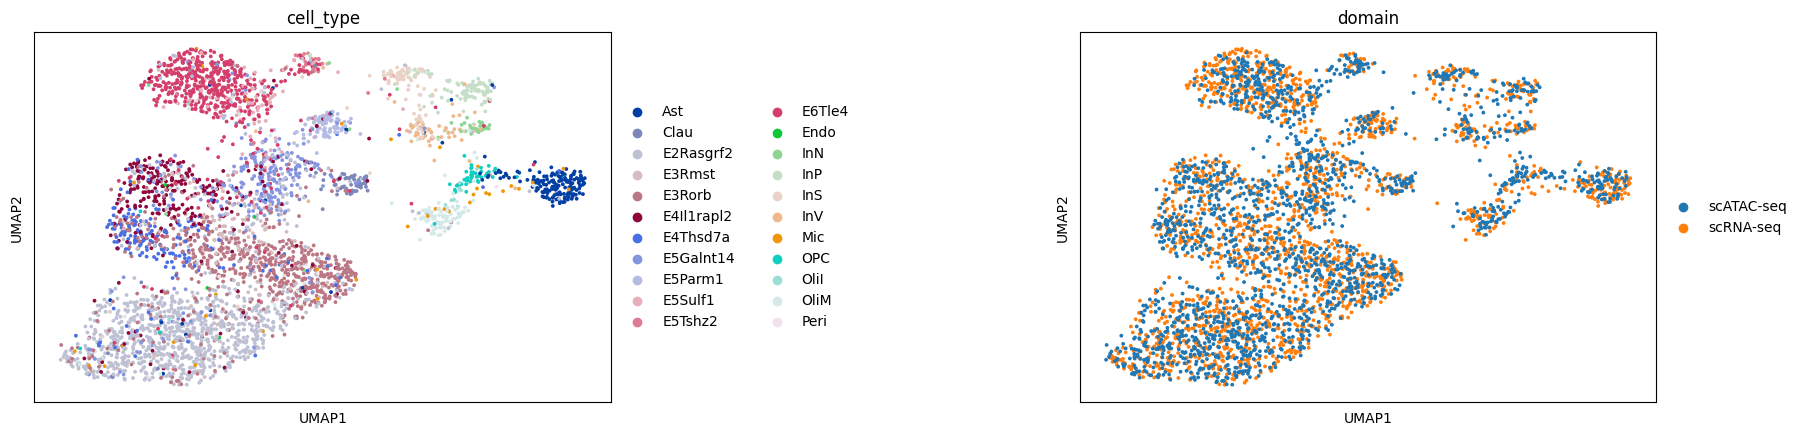

resolution: 0.1, nmi: 0.3099692733263048
resolution: 0.2, nmi: 0.3693647590472772
resolution: 0.3, nmi: 0.38664519908985107
resolution: 0.4, nmi: 0.39134613588595163
resolution: 0.5, nmi: 0.39358011182057784
resolution: 0.6, nmi: 0.3981978674599357
resolution: 0.7, nmi: 0.39822531562787844
resolution: 0.8, nmi: 0.39877112056580916
resolution: 0.9, nmi: 0.3880319750871907
resolution: 1.0, nmi: 0.39164135734690053
resolution: 1.1, nmi: 0.38003470415217205
resolution: 1.2, nmi: 0.3851888402154099
resolution: 1.3, nmi: 0.3840157142816759
resolution: 1.4, nmi: 0.38423883158137984
resolution: 1.5, nmi: 0.3807988996180566
resolution: 1.6, nmi: 0.38457838903118846
resolution: 1.7, nmi: 0.3823468465195435
resolution: 1.8, nmi: 0.3790878874109328
resolution: 1.9, nmi: 0.3814567910385622
resolution: 2.0, nmi: 0.3796951765993088
optimised clustering against cell_type
optimal cluster resolution: 0.8
optimal score: 0.39877112056580916
resolution: 0.1, nmi: 0.3099692733263048
resolution: 0.2, nmi: 0.

In [5]:
import networkx as nx
import anndata as ad

rna=ad.read_h5ad('paired_data/rna1129.h5ad')
atac=ad.read_h5ad('paired_data/atac1129.h5ad')
# guidance = nx.read_graphml(path+"guidance_full_data.graphml.gz")
guidance=nx.read_graphml('paired_data/full_guidance.graphml.gz')

path = 'baseline.dill'

from scglue import *
glue_base = models.load_model(path)
atac.obsm['X_glue']=glue_base.encode_data('atac',atac)

rna.obsm['X_glue']=glue_base.encode_data('rna',rna)

import scanpy as sc
comb=ad.concat([rna,atac])
sc.pp.neighbors(comb,use_rep='X_glue',metric='cosine')
sc.tl.umap(comb)
sc.pl.umap(comb,color=['cell_type','domain'],wspace=0.65)

df_list.append(run_scib2(atac,'X_glue'))
name_list.append('baseline')

/home/ubuntu0/GLUE


/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[INFO] autodevice: Using GPU 0 as computation device.
/tmp/tmpq2v3dxu2
genome mm10 True
/home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
True /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa -bed /tmp/tmpq2v3dxu2 -fo /tmp/tmpbednvr90


/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


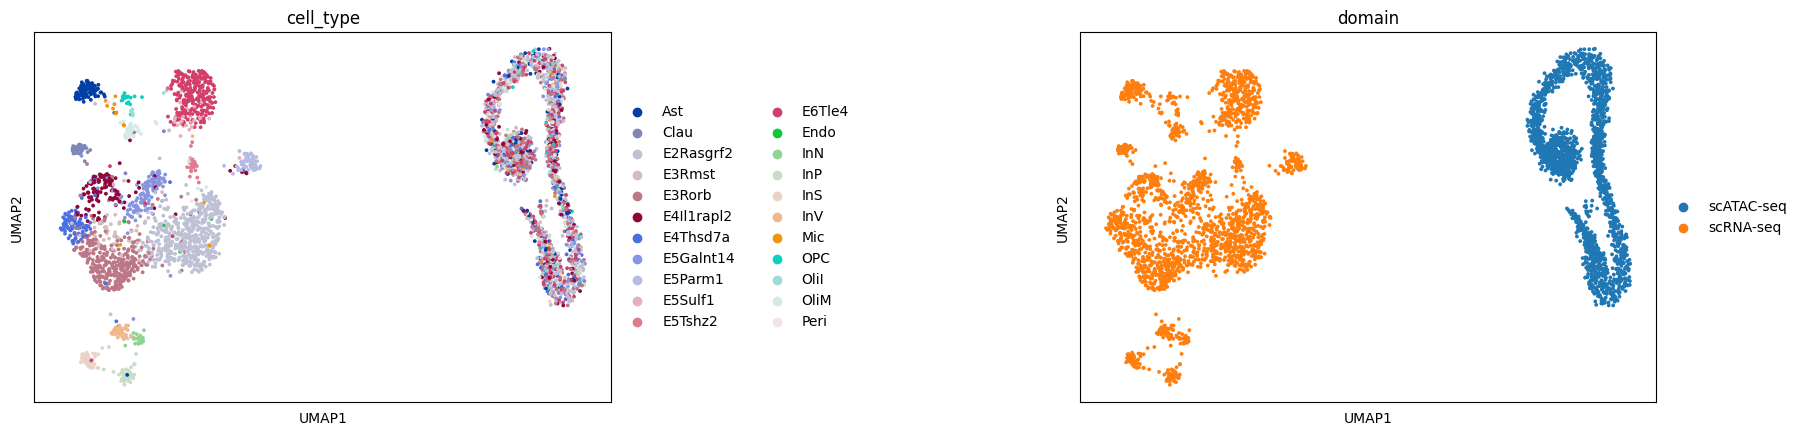

In [3]:

import networkx as nx
import anndata as ad

rna=ad.read_h5ad('paired_data/rna1129.h5ad')
atac=ad.read_h5ad('paired_data/atac1129.h5ad')
# guidance = nx.read_graphml(path+"guidance_full_data.graphml.gz")
guidance=nx.read_graphml('paired_data/full_guidance.graphml.gz')
from scglue3 import *
models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

models.configure_dataset(
    atac, "NB_seq", use_highly_variable=True,
    #use_rep="X_lsi"
)

path = 'scglue3_new.dill'

glue = models.load_model(path)
atac.obsm['X_glue']=glue.encode_data('atac',atac)

rna.obsm['X_glue']=glue.encode_data('rna',rna)

import scanpy as sc
comb=ad.concat([rna,atac])
sc.pp.neighbors(comb,use_rep='X_glue',metric='cosine')
sc.tl.umap(comb)
sc.pl.umap(comb,color=['cell_type','domain'],wspace=0.65)

# df_list.append(run_scib2(atac,'X_glue'))
# name_list.append('M1')


/home/ubuntu0/GLUE
/tmp/tmp103tt3a5
genome mm10 True
/home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
True /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa -bed /tmp/tmp103tt3a5 -fo /tmp/tmprsah0sug


/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


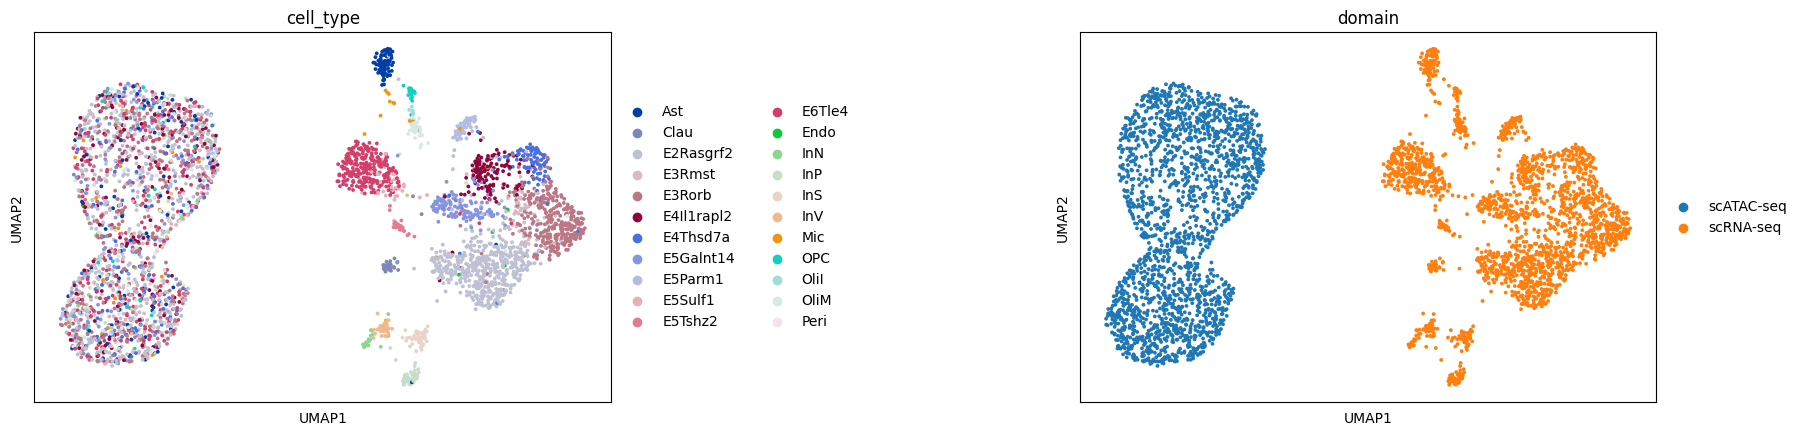

In [5]:
import os 
print(os.getcwd())
os.chdir('/home/ubuntu0/GLUE/')

import networkx as nx
import anndata as ad

rna=ad.read_h5ad('paired_data/rna1129.h5ad')
atac=ad.read_h5ad('paired_data/atac1129.h5ad')
# guidance = nx.read_graphml(path+"guidance_full_data.graphml.gz")
guidance=nx.read_graphml('paired_data/full_guidance.graphml.gz')
from scglue3_copy import *
models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

models.configure_dataset(
    atac, "NB_seq", use_highly_variable=True,
    #use_rep="X_lsi"
)

path = '/home/ubuntu0/GLUE/glue/pretrain/pretrain_glue3.dill'

glue = models.load_model(path)
atac.obsm['X_glue']=glue.encode_data('atac',atac)

rna.obsm['X_glue']=glue.encode_data('rna',rna)

import scanpy as sc
comb=ad.concat([rna,atac])
sc.pp.neighbors(comb,use_rep='X_glue',metric='cosine')
sc.tl.umap(comb)
sc.pl.umap(comb,color=['cell_type','domain'],wspace=0.65)

# df_list.append(run_scib2(atac,'X_glue'))
# name_list.append('M2')

/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[INFO] autodevice: Using GPU 0 as computation device.
/tmp/tmp8x42nekl
genome mm10 True
/home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
True /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa -bed /tmp/tmp8x42nekl -fo /tmp/tmp3smjfik9
/tmp/tmphr3kx6_2
genome mm10 True
/home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
True /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa -bed /tmp/tmphr3kx6_2 -fo /tmp/tmpchzhi7no


/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


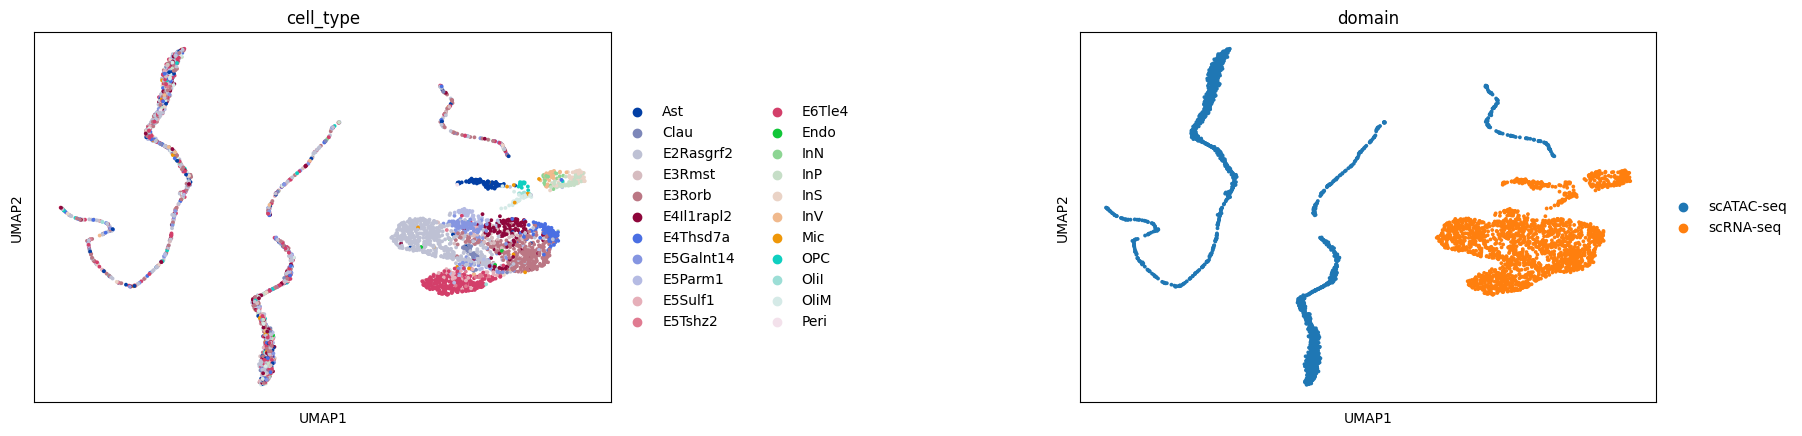

In [3]:


from scglue3_subsample import *
import anndata as ad
import networkx as nx

atac=ad.read_h5ad('paired_data/atac1129.h5ad')
rna=ad.read_h5ad('paired_data/rna1129.h5ad')

guidance = nx.read_graphml('paired_data/full_guidance.graphml.gz')

models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

models.configure_dataset(
    atac, "NB_seq", use_highly_variable=True,
    #use_rep="X_lsi"
)

# path = '/home/ubuntu0/GLUE/glue/fine-tune/fine-tunescblsi2.dill'
#load other model 
path = '/home/ubuntu0/GLUE/glue/fine-tune/fine-tune20240110.dill'
# path = '/home/ubuntu0/GLUE/glue/pretrain/pretrain_scb2.dill'
glue = models.load_model(path)

from scglue3_scb.utils import convert2sequence
_,atac_seq = convert2sequence(atac[:,atac.var.query('highly_variable').index.to_numpy().tolist()])
import torch 
atac_seq=torch.as_tensor(atac_seq,dtype=torch.float32)
rna.obsm['X_glue']=glue.encode_data('rna',rna,atac_seq)
atac.obsm['X_glue']=glue.encode_data('atac',atac,atac_seq)


import matplotlib.pyplot as plt
import scanpy as sc
def plot_glue_combined(rna,atac):
    '''
    rna and atac have obsm['X_glue']
    '''
    
    comb=ad.concat([rna,atac])
    sc.pp.neighbors(comb,use_rep='X_glue',metric='cosine')
    sc.tl.umap(comb)
    sc.pl.umap(comb,color=['cell_type','domain'],wspace=0.65)
    
plot_glue_combined(rna,atac)

# df_list.append(run_scib2(atac,'X_glue'))
# name_list.append('M3')

[INFO] autodevice: Using GPU 0 as computation device.
[INFO] autodevice: Using GPU 0 as computation device.
[INFO] autodevice: Using GPU 0 as computation device.
/tmp/tmp61ucrlsd
genome mm10 True
/home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
True /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa -bed /tmp/tmp61ucrlsd -fo /tmp/tmp4hufg5z3
/tmp/tmptoimx6yu
genome mm10 True
/home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
True /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa -bed /tmp/tmptoimx6yu -fo /tmp/tmpn7o0kll7


/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


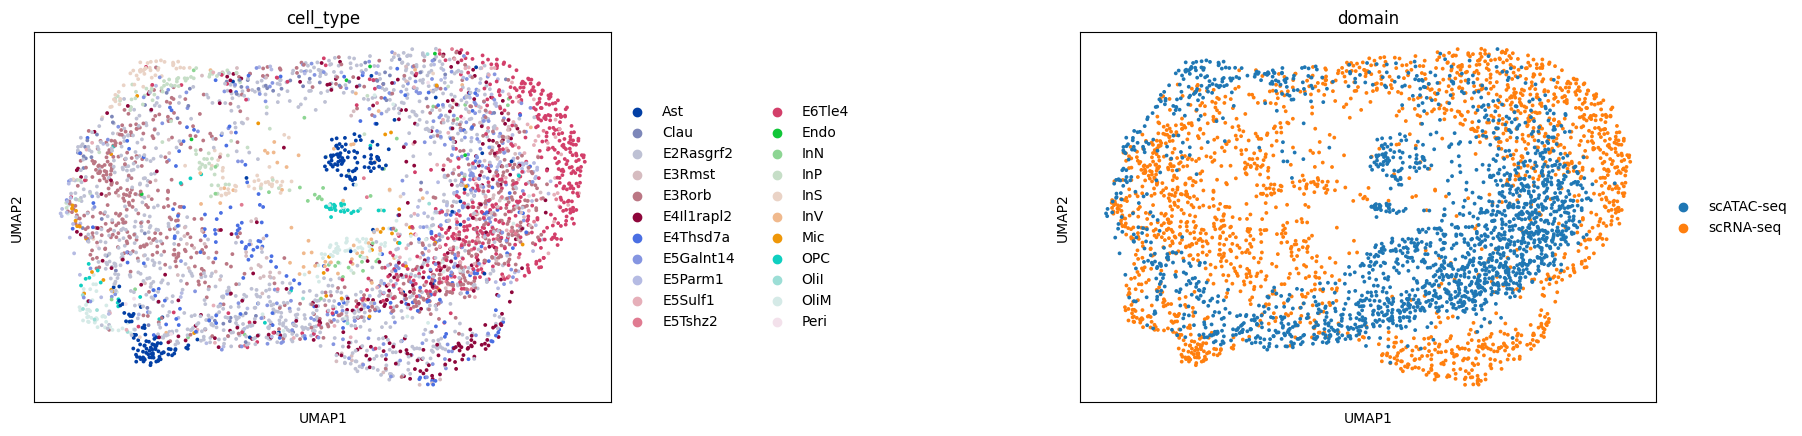

In [4]:


from scglue3_scb_lsi import *
import anndata as ad
import networkx as nx
# path='/home/ubuntu0/scBasset/'
atac=ad.read_h5ad('paired_data/atac1129.h5ad')
rna=ad.read_h5ad('paired_data/rna1129.h5ad')

guidance = nx.read_graphml('paired_data/full_guidance.graphml.gz')

models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

models.configure_dataset(
    atac, "NB_seq", use_highly_variable=True,
    #use_rep="X_lsi"
)

path = '/home/ubuntu0/GLUE/glue/fine-tune/fine-tunescblsi2.dill'

# path = '/home/ubuntu0/GLUE/glue/pretrain/pretrain_scb2.dill'
glue = models.load_model(path)

from scglue3_scb.utils import convert2sequence
_,atac_seq = convert2sequence(atac[:,atac.var.query('highly_variable').index.to_numpy().tolist()])
import torch 
atac_seq=torch.as_tensor(atac_seq,dtype=torch.float32)
rna.obsm['X_glue']=glue.encode_data('rna',rna,atac_seq)
atac.obsm['X_glue']=glue.encode_data('atac',atac,atac_seq)


import matplotlib.pyplot as plt
import scanpy as sc
def plot_glue_combined(rna,atac):
    '''
    rna and atac have obsm['X_glue']
    '''
    
    comb=ad.concat([rna,atac])
    sc.pp.neighbors(comb,use_rep='X_glue',metric='cosine')
    sc.tl.umap(comb)
    sc.pl.umap(comb,color=['cell_type','domain'],wspace=0.65)
    
plot_glue_combined(rna,atac)

/home/ubuntu0/GLUE
/tmp/tmpzmd8kph6
genome mm10 True
/home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
True /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa -bed /tmp/tmpzmd8kph6 -fo /tmp/tmp_1wmkg8z
/tmp/tmp2x5tu_5o
genome mm10 True
/home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
True /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa -bed /tmp/tmp2x5tu_5o -fo /tmp/tmpy4sm2j_x


/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


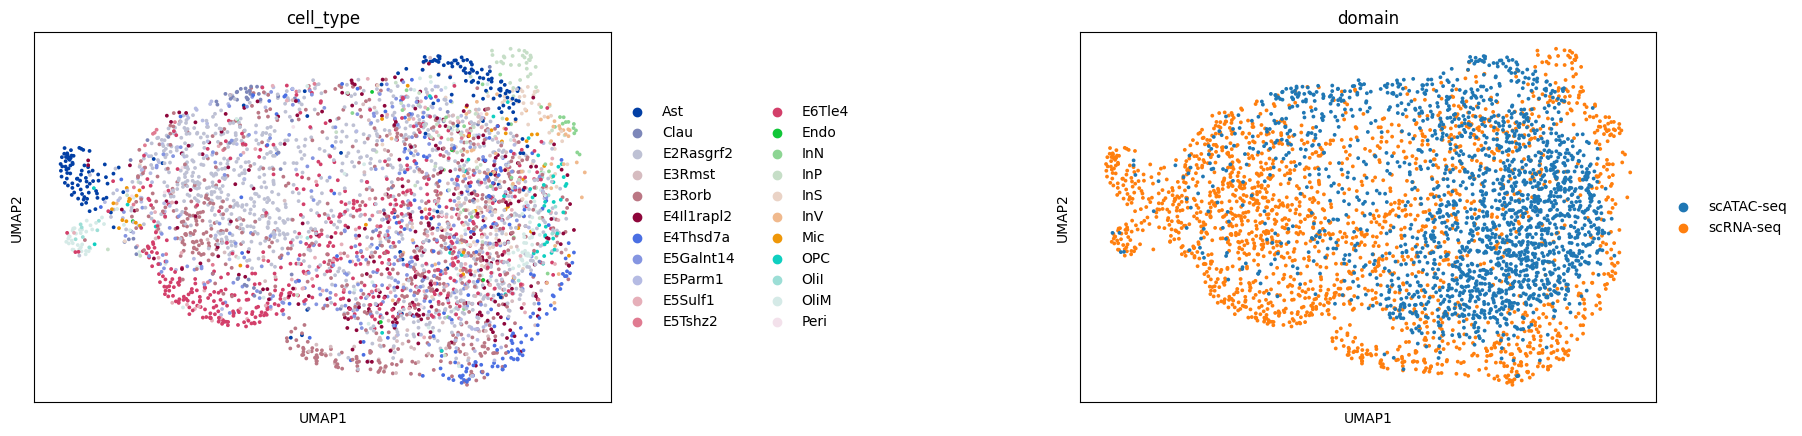

In [6]:
import os 
print(os.getcwd())
os.chdir('/home/ubuntu0/GLUE/')

from scglue3_scb_lsi import *
import anndata as ad
import networkx as nx
# path='/home/ubuntu0/scBasset/'
atac=ad.read_h5ad('paired_data/atac1129.h5ad')
rna=ad.read_h5ad('paired_data/rna1129.h5ad')

guidance = nx.read_graphml('paired_data/full_guidance.graphml.gz')

models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

models.configure_dataset(
    atac, "NB_seq", use_highly_variable=True,
    #use_rep="X_lsi"
)

# path = '/home/ubuntu0/GLUE/glue/fine-tune/fine-tunescblsi2.dill'
path = '/home/ubuntu0/GLUE/glue/fine-tune/fine-tunescblsi.dill'
# path = '/home/ubuntu0/GLUE/glue/pretrain/pretrain_scb2.dill'
glue = models.load_model(path)

from scglue3_scb.utils import convert2sequence
_,atac_seq = convert2sequence(atac[:,atac.var.query('highly_variable').index.to_numpy().tolist()])
import torch 
atac_seq=torch.as_tensor(atac_seq,dtype=torch.float32)
rna.obsm['X_glue']=glue.encode_data('rna',rna,atac_seq)
atac.obsm['X_glue']=glue.encode_data('atac',atac,atac_seq)


import matplotlib.pyplot as plt
import scanpy as sc
def plot_glue_combined(rna,atac):
    '''
    rna and atac have obsm['X_glue']
    '''
    
    comb=ad.concat([rna,atac])
    sc.pp.neighbors(comb,use_rep='X_glue',metric='cosine')
    sc.tl.umap(comb)
    sc.pl.umap(comb,color=['cell_type','domain'],wspace=0.65)
    
plot_glue_combined(rna,atac)

# df_list.append(run_scib2(atac,'X_glue'))
# name_list.append('M4(lsi)')

/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[INFO] autodevice: Using GPU 0 as computation device.
/tmp/tmpk98i7d0_
genome mm10 True
/home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
True /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa -bed /tmp/tmpk98i7d0_ -fo /tmp/tmp6h9n9i_b
/tmp/tmp4x5ybg9t
genome mm10 True
/home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
True /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /home/ubuntu0/GLUE/experiments/Atlas/scripts/mm10.fa -bed /tmp/tmp4x5ybg9t -fo /tmp/tmpyhwhk_zp


/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu0/miniconda3/envs/glue2_scib/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


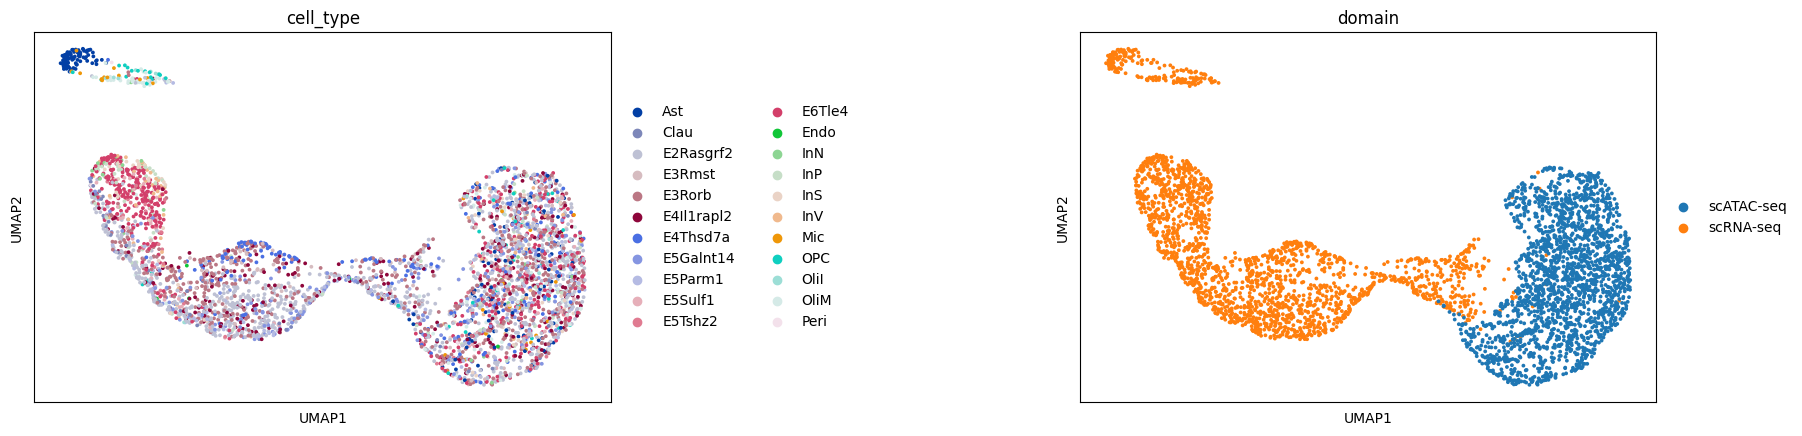

In [3]:


from scglue3_scb import *
import anndata as ad
import networkx as nx
# path='/home/ubuntu0/scBasset/'
atac=ad.read_h5ad('paired_data/atac1129.h5ad')
rna=ad.read_h5ad('paired_data/rna1129.h5ad')

guidance = nx.read_graphml('paired_data/full_guidance.graphml.gz')

models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

models.configure_dataset(
    atac, "NB_seq", use_highly_variable=True,
    #use_rep="X_lsi"
)

# path = '/home/ubuntu0/GLUE/glue/fine-tune/fine-tunescblsi2.dill'
#load other model 
path = '/home/ubuntu0/GLUE/glue/fine-tune/fine-tune20240111.dill'
# path = '/home/ubuntu0/GLUE/glue/pretrain/pretrain_scb2.dill'
glue = models.load_model(path)

from scglue3_scb.utils import convert2sequence
_,atac_seq = convert2sequence(atac[:,atac.var.query('highly_variable').index.to_numpy().tolist()])
import torch 
atac_seq=torch.as_tensor(atac_seq,dtype=torch.float32)
rna.obsm['X_glue']=glue.encode_data('rna',rna,atac_seq)
atac.obsm['X_glue']=glue.encode_data('atac',atac,atac_seq)


import matplotlib.pyplot as plt
import scanpy as sc
def plot_glue_combined(rna,atac):
    '''
    rna and atac have obsm['X_glue']
    '''
    
    comb=ad.concat([rna,atac])
    sc.pp.neighbors(comb,use_rep='X_glue',metric='cosine')
    sc.tl.umap(comb)
    sc.pl.umap(comb,color=['cell_type','domain'],wspace=0.65)
    
plot_glue_combined(rna,atac)

# df_list.append(run_scib2(atac,'X_glue'))
# name_list.append('M4')

In [13]:
import pandas as pd
def metric_res(dflist,data_namelist):
    gmetrics=pd.concat(dflist,axis='rows')
    gmetrics=gmetrics.set_axis(data_namelist,axis='rows')
    bio_style=gmetrics.style.background_gradient(cmap = 'Blues')
    return gmetrics,bio_style

In [14]:
metric,metric_style = metric_res(df_list,name_list)

In [15]:
metric_style

,ari,nmi,isolated_labels_aws,isolated_labels_f1,silhouette,clisi,bio
baseline,0.315154,0.398771,0.483763,0.384234,0.485471,0.926089,0.498914
M1,0.000090,0.472874,0.174405,0.174499,0.056594,0.654072,0.255422
M2,-0.000270,0.040361,0.347097,0.101964,0.340460,0.773353,0.267161
M3,0.000256,0.092193,0.335823,0.093274,0.327366,0.748666,0.266263
M4,0.000233,0.053777,0.363077,0.097656,0.374018,0.764556,0.275553
M4(lsi),0.056201,0.199915,0.458548,0.293148,0.442369,0.832356,0.380423


In [ ]:
metric.to_csv('scib_mod_model.csv')

<Figure size 768x576 with 0 Axes>

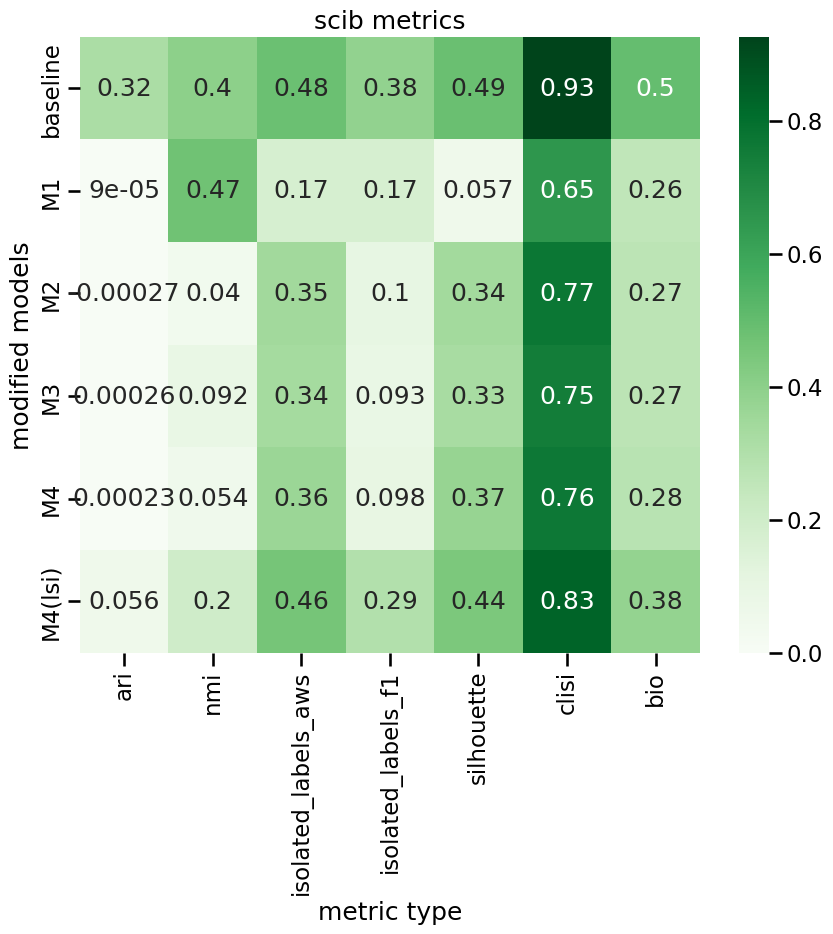

In [18]:
import seaborn as sns

plt.figure(dpi=120)
f,ax=plt.subplots(figsize=(10,8))

sns.heatmap(data=metric,
           cmap=plt.get_cmap('Greens'),
           annot=True,
            #not_kws={'size':1},
            
           )

plt.title('scib metrics')
plt.xlabel('metric type')
plt.ylabel('modified models')
plt.savefig('scib_heatmap_mod.png',bbox_inches='tight')